<img style="float: left; margin: 30px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="300" height="500" /> 
    
    
### Simulación de procesos financieros. 

**Nombres:** `[Jesús Guillermo Sainz Zárate, Alejandro Frizard Aguilar]`

**Fecha:** 04 de marzo del 2024.

**Expediente** : `[7530501, ]`.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/GuillermoSainz07/ProyectoConjunto_FAAlejandro_JGSainz

# Tarea 5: Clase 10


# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
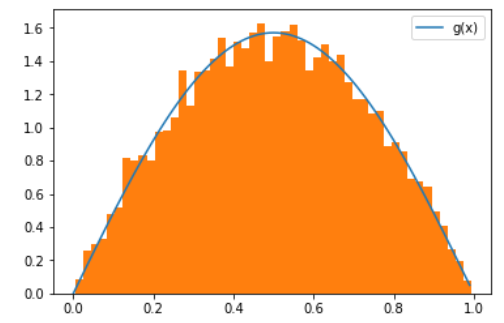

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
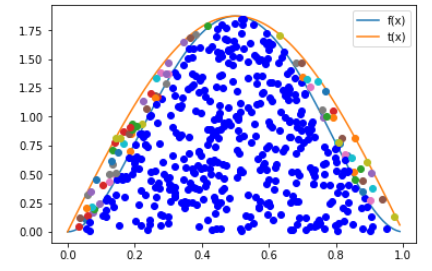

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    

Demuestre matemáticamente que 
 $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
 y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.
> **Ayuda**: $
\begin{aligned}
\frac{p_{k+1}}{p_k}& = \frac{e^{-\lambda}(\lambda)^k}{k!} \\
& = \frac{e^{-\lambda}(\lambda)^k}{k!}
\end{aligned}
$

**Alumno 1 GS:**

In [253]:
# Solucion codigo
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy import optimize
import numpy as np
from time import time
from math import factorial

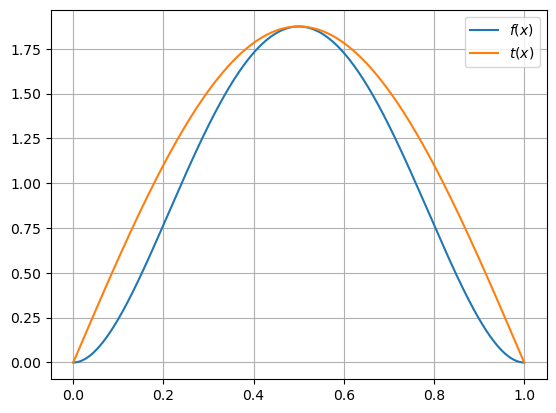

In [239]:
x = np.linspace(0,1,500)
fx = lambda x: 30*(x**2 - 2*x**3 + x**4)
a =  fx(optimize.fmin(lambda x:-fx(x), 0, disp=False))[0]
tx = lambda x: a*np.sin(np.pi*x)
plt.plot(x,fx(x), label='$f(x)$')
plt.plot(x, tx(x), label='$t(x)$')
plt.legend()
plt.grid()
plt.show()

2. $t(x)$ no es una funcion de densidad debido a que no integra 1, es decir $\int_{-\infty}^{\infty} t(x) dx \geq 1$, por lo que debemos encontrar una funcion que integre 1 partir de $t(x)$, esta nueva funcion sera llamada $g(x)$ y se consigue de la siguiente manera:

$$c =\int_{-\infty}^{\infty} t(x) dx$$


$$g(x) = \frac{1}{c} a \sin{(\pi x)} = \frac{1}{c} t(x)$$


podemos comprobar que $g(x)$ integra 1 ya que:

$$\int_{-\infty}^{\infty} g(x) dx = \int_{-\infty}^{\infty} \frac{1}{c} t(x) dx = $$
$$ \frac{1}{c} \int_{-\infty}^{\infty} t(x) dx = 1 $$ 


3. Empezamos encontrando c
$c = \int_{-\infty}^{\infty} t(x) dx = \int_{-\infty}^{0} t(x) dx + \int_{0}^{1} t(x) dx +\int_{1}^{\infty} t(x) dx = 0 + \int_{0}^{1} t(x) dx + 0 $

$c = \int_{0}^{1} t(x) dx = \int_{0}^{1} a \sin{(\pi x)} dx = a \int_{0}^{1} \sin{(\pi x)} dx = \frac{a}{\pi} |^{1}_{0} -\cos(x \pi) = \frac{2a}{\pi}$

$$g(x) = \frac{a}{c} \sin(\pi x)$$
$G(x) = \int_{-\infty}^{x} g(x) dx = \frac{a}{c} \int_{-\infty}^{x} \sin(\pi x) dx = \frac{a}{c}[\int_{-\infty}^{0} \sin(\pi x) + \int_{0}^{x} \sin(\pi x)] =  \frac{a}{c}[0 + \int_{0}^{x} \sin(\pi x)] = \frac{a}{c}[\frac{1}{\pi} |_{0}^{\pi x} -\cos(\pi x)] = \frac{a}{c\pi} [-\cos(\pi x) + 1]$

Inversa:

$\frac{a}{c\pi} [-\cos(\pi x) + 1] = U$
De tal manera que 

$x = \frac{1}{\pi} [\arccos(-\frac{U c \pi}{a} + 1)]$


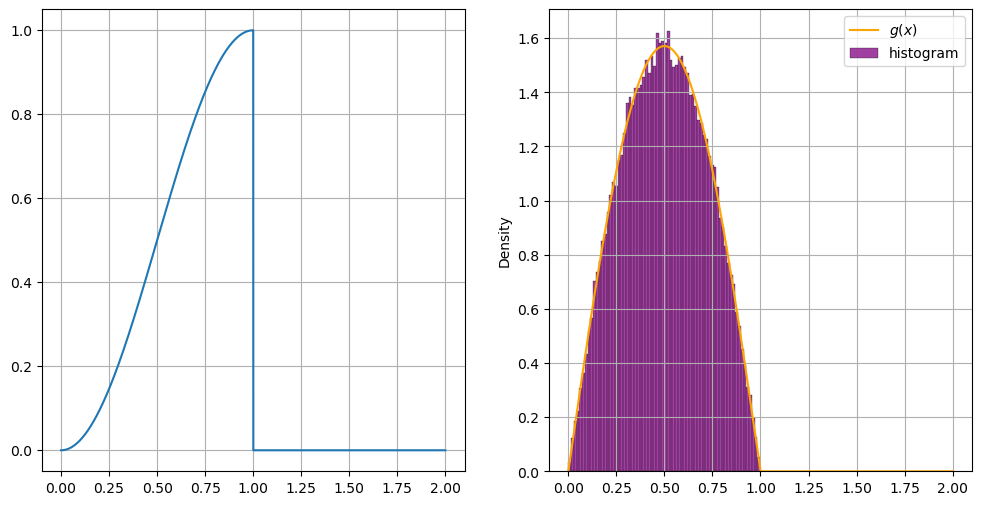

In [230]:
# Solucion 4
c = (2*a)/(np.pi)

G = lambda x: (a/(c*np.pi)) * (-np.cos(np.pi*x) + 1) if x >= 0 and x <= 1 else 0

G = np.vectorize(G)
g_values = np.linspace(0,2,100_000)

G_inv = lambda u: (1/np.pi) * np.arccos(-((u*c*np.pi)/a) + 1)
G_inv = np.vectorize(G_inv)

U = np.random.rand(100_000)
x_gen = G_inv(U)
g = lambda x: (a/c)*np.sin(np.pi*x) if x>=0 and x<=1 else 0
g = np.vectorize(g)
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(g_values, G(g_values))
ax[0].grid()


ax[1].plot(g_values, g(g_values), label='$g(x)$', color='orange')
sns.histplot(x_gen,
         stat='density',
         label='histogram',
         color='purple', ax=ax[1])
ax[1].grid()


ax[1].legend()
plt.show()

In [269]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f',
                 x:'valores x'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    accepted_per = np.mean(condition)
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    print(f'Percentage Accepted: {accepted_per}')
    plt.plot(x,f(x), label='$f(x)$')
    plt.plot(x,t(x), label='$t(x)$', color='orange')
    plt.legend()
    plt.grid()   
    plt.show()

Percentage Accepted: 0.846


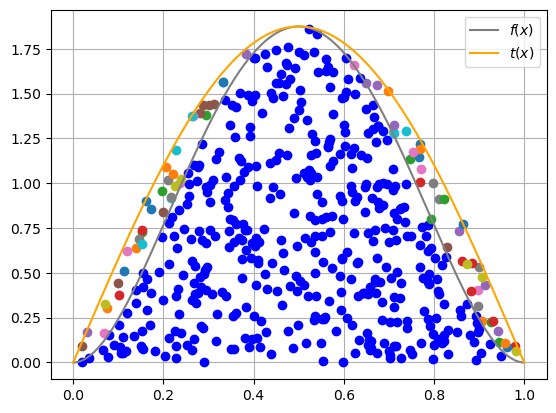

0.6111209392547607


In [270]:
# Solucion 5
start = time()
R2 = np.random.uniform(0,1,500)
R1 = G_inv(np.random.rand(500))
Acep_rechazo(R2,R1,fx,tx, x)
end = time()
print(end-start)

Percentage Accepted: 0.702


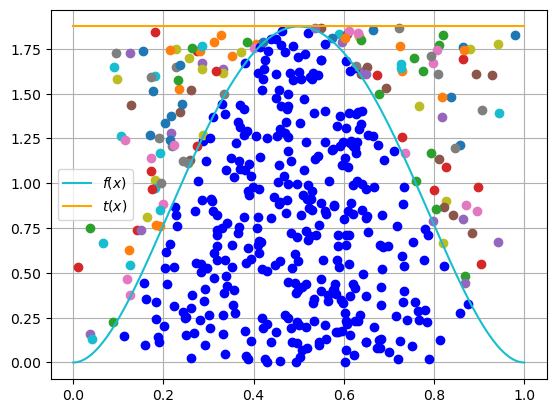

1.1062595844268799


In [248]:
# Solucion 6
start = time()
R1_cons = np.random.rand(500)
fc = lambda x: a*np.ones(500)
Acep_rechazo(R2,R1,fx,fc,x)
end = time()
print(end - start)

Conclusion 6: Podemos ver que la cantidad aceptada es mucho menor y el tiempo es casi el doble, por lo que es recomendable restringir la zona de aceptación y rechazo desde el principio.

Percentage Accepted: 0.58


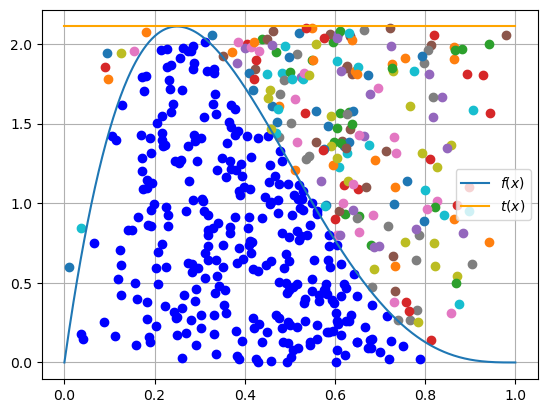

In [250]:
# Solucion codigo 7
fx_2 = lambda x: 20*x*(1-x)**3
a_2 =  fx_2(optimize.fmin(lambda x:-fx_2(x), 0, disp=False))[0]

R1_cons = np.random.rand(500)
fc = lambda x: a_2*np.ones(500)
Acep_rechazo(R2,R1,fx_2,fc,x)


Resolucion ejercicion 8:
$$P_{i+1} = \binom{n}{i+1} p ^{i+1} (1-p) ^{n - (i+1)} = \frac{p}{1-p} \frac{n-i}{i+1} \binom{n}{i} p^i (1-p)^{n-i}$$


$$= \frac{p}{1-p} \frac{n-i}{i+1}p_i$$

In [318]:
val = np.arange(0,8,1)
ppf = lambda x,l: (np.exp(-l)*(l**x))/factorial(x)
probs = [ppf(x,1) for x in val]
prob_cum = np.cumsum(probs)

In [319]:
# Generacion de variables aleatorias poisson
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar (sumatoria de probabilidad de ocurrencia)',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    
    # Diccionario de valores aleatorios
    index2value = {i: val_i for i, val_i in enumerate(indices)}
    # Series de los valores aletorios generados

    ran = [index2value.get(sum([1 for i in p_acum if i<u])) for u in U]

    return ran

In [320]:
poi = Gen_distr_discreta(prob_cum, val, 10_000)

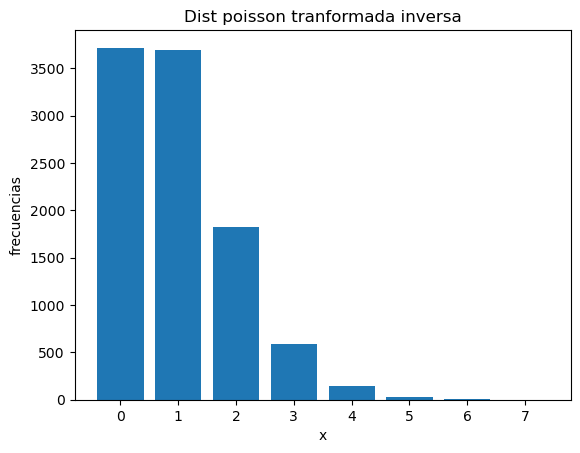

In [323]:
y, bins = np.histogram(poi, bins=len(set(val)))
plt.bar(val, y)
plt.title('Dist poisson tranformada inversa')
plt.xlabel('x')
plt.ylabel('frecuencias')
plt.show()

Demostrar: $P(k+1,\lambda)=\frac{\lambda}{k+1}P(k)$
$$P(k+1,\lambda) = \frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!}$$

Ahora simplemente dividimos este resultado aprovechando las propiedades de los exponentes y factoriales, es decir $x^{n}x^{m} = x^{n+m}$ y $x! = x\cdot (x-1)!$ lo que es equivalente a: $(x+1)! = (x+1)\cdot x!$

Por lo tanto: $\frac{\lambda}{k+1} \frac{e^{-\lambda}\lambda^{k}}{k!} = \frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!} = \frac{e^{-\lambda}}{(k+1)} p(k,\lambda)$

**Alumnos 2 FA:**

**Soluciones (texto)**

In [3]:
# Solucion codigo